### **আউটলায়ার হ্যান্ডলিং ইন মেশিন লার্নিং (বাংলায়)**  

ডেটাসেটে **আউটলায়ার (Outliers)** থাকলে মেশিন লার্নিং মডেলের পারফরম্যান্স খারাপ হতে পারে। এখানে আউটলায়ার ডিটেকশন ও হ্যান্ডলিংয়ের সম্পূর্ণ গাইড দেওয়া হলো:

---

## **১. আউটলায়ার কি?**  
আউটলায়ার হলো এমন ডেটা পয়েন্ট যেগুলো **অন্যান্য ডেটা থেকে অস্বাভাবিকভাবে দূরে** থাকে।  
**উদাহরণ:**  
- একটি ক্লাসের শিক্ষার্থীদের প্রাপ্ত নম্বর: `[55, 60, 65, 58, 90, 59, 62, **200**]` → `200` একটি আউটলায়ার।  

---

## **২. আউটলায়ার ডিটেক্ট করার পদ্ধতি**  
### **(ক) বক্সপ্লট (Boxplot) দিয়ে ভিজ্যুয়ালাইজেশন**  
```python
import seaborn as sns
sns.boxplot(data=df['column_name'])
```
![Boxplot](https://i.imgur.com/JQY1xWl.png)  
**বক্সের বাইরের ডটগুলি** আউটলায়ার।  

### **(খ) Z-Score মেথড**  
```python
from scipy import stats
z_scores = stats.zscore(df['column'])
outliers = df[abs(z_scores) > 3]  # Z-Score > 3 হলে আউটলায়ার
```

### **(গ) IQR (Interquartile Range) মেথড**  
```python
Q1 = df['column'].quantile(0.25)
Q3 = df['column'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['column'] < lower_bound) | (df['column'] > upper_bound)]
```

### **(ঘ) DBSCAN (Clustering-Based)**  
```python
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=3, min_samples=2)
clusters = model.fit_predict(df[['column']])
outliers = df[clusters == -1]  # -1 লেবেল আউটলায়ার
```

---

## **৩. আউটলায়ার হ্যান্ডলিংয়ের উপায়**  

### **(ক) ডিলিট করা (Remove Outliers)**  
```python
df_clean = df[(df['column'] >= lower_bound) & (df['column'] <= upper_bound)]
```
**খারাপ দিক:** ডেটা লস হয়।  

### **(খ) রিপ্লেস করা (Capping/Winsorizing)**  
```python
df['column'] = df['column'].clip(lower_bound, upper_bound)
```
**এতে আউটলায়ারগুলিকে** `lower_bound`/`upper_bound`-এ সেট করা হয়।  

### **(গ) ট্রান্সফর্মেশন (Log, Square Root)**  

**স্কিউড ডেটার জন্য ভালো** (যেমন: স্যালারি ডেটা)।  

### **(ঘ) বিঞ্চমার্কিং (Binning)**  
```python
df['binned_column'] = pd.cut(df['column'], bins=5)
```
**ক্যাটাগরিকাল ভ্যারিয়েবলে** রূপান্তর করে।  

### **(ঙ) রোবস্ট মডেল ব্যবহার (Robust Models)**  
- **Linear Regression**-এর বদলে **RANSACRegressor**  
- **Decision Tree**, **Random Forest** আউটলায়ারে কম সেনসিটিভ  

---

## **৪. কোন মডেলে আউটলায়ার ইম্প্যাক্ট করে?**  
| **মডেল টাইপ**       | **আউটলায়ার ইফেক্ট** | **সমাধান**               |  
|----------------------|---------------------|--------------------------|  
| **লিনিয়ার রিগ্রেশন**  | High                | Winsorizing/Robust Models|  
| **ডিসিশন ট্রি**       | Low                 | Nothing Needed           |  
| **SVM**              | High                | Remove Outliers          |  
| **নিউরাল নেটওয়ার্ক**  | Moderate            | Normalization/Scaling    |  

---

## **৫. বেস্ট প্রাকটিস**  
1. **প্রথমে ডিটেক্ট করুন** (Boxplot/Z-Score দিয়ে)।  
2. **ডোমেইন জ্ঞান ব্যবহার করুন** (যেমন: `বয়স = 200` সম্ভব নয় → রিমুভ করুন)।  
3. **ট্রাই করুন বিভিন্ন অ্যাপ্রোচ** (Deletion vs. Transformation)।  
4. **রোবস্ট মেট্রিক্স ব্যবহার করুন** (যেমন: `MAE` instead of `RMSE`)।  


### **সারসংক্ষেপ**  
- **আউটলায়ার ডিটেক্ট করুন** → Boxplot, IQR, Z-Score দিয়ে।  
- **হ্যান্ডল করুন** → Remove/Cap/Transform/Robust Model ব্যবহার করে।  
- **টেস্ট করুন** → মডেল পারফরম্যান্স চেক করুন।  

আউটলায়ার ম্যানেজমেন্টের পরে আপনার মডেলের অ্যাকুরেসি বাড়বে! 🚀

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df=df.iloc[:,[1,2,4,5,6,7,9,11]]


In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
impute_array=knn.fit_transform(df.drop(['Sex','Embarked'],axis=1))
impute_array

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    , 26.8   ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

<Axes: ylabel='Density'>

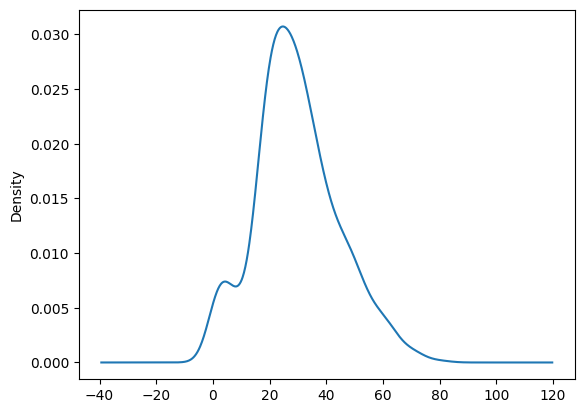

In [ ]:
df['Age'].plot(kind='kde')
#distribution Close to Normal that is why we can apply Z-scoring method

<Axes: ylabel='Age'>

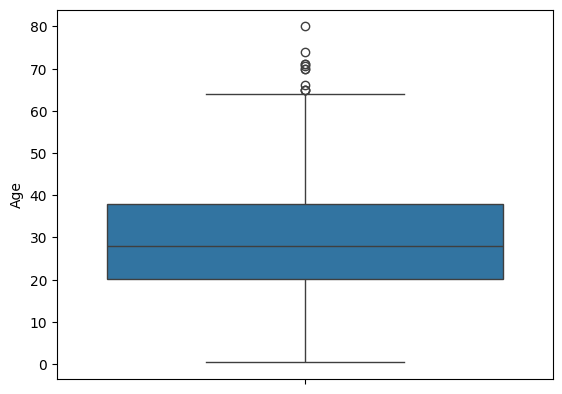

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
low_lt=df['Age'].mean()-df['Age'].std()*3
upper_lt=df['Age'].mean()+df['Age'].std()*3
print(f'Lower Limit:{low_lt},Upper Limit:{upper_lt}')

Lower Limit:-13.88037434994331,Upper Limit:73.27860964406095


#Triming(Deleting)

In [ ]:
# df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # non-numeric value গুলোকে NaN বানাবে
df['Age'] = df['Age'].fillna(df['Age'].mean())         # এখন safely mean দিয়ে fill হবে


In [ ]:
type(upper_lt)

numpy.float64

In [ ]:
mask1=df['Age']<upper_lt
mask2=df['Age']>low_lt

In [ ]:
df2=df[mask1 | mask2]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<Axes: ylabel='Age'>

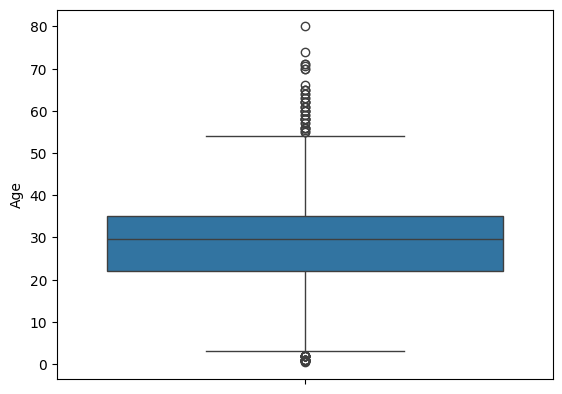

In [ ]:
sns.boxplot(df['Age'])

#Capping

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
low_lt,upper_lt

(np.float64(-13.88037434994331), np.float64(73.27860964406095))

In [ ]:
df['Age']=np.where(df['Age']>upper_lt,upper_lt,np.where(df['Age']<low_lt,low_lt,df['Age']))

<Axes: ylabel='Density'>

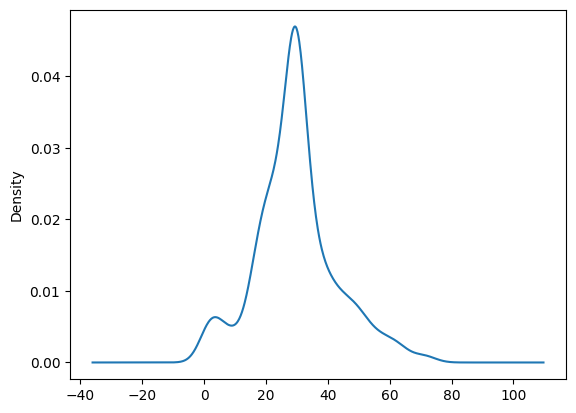

In [ ]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Age'>

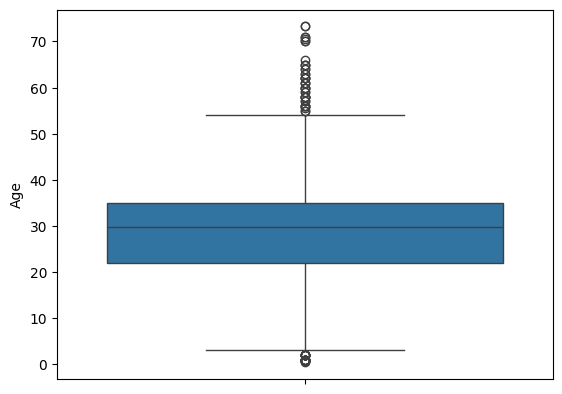

In [ ]:
sns.boxplot(df['Age'])
#Since Data was something Skewed thas why more outlier occure

#Day-43:IQR Mehood

In [ ]:
dfi=pd.read_csv('/content/Titanic-Dataset.csv')
dfi.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dfi=dfi.iloc[:,[5,9]]
dfi.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
dfi.isnull().sum()

,0
Age,177
Fare,0


<Axes: xlabel='Age'>

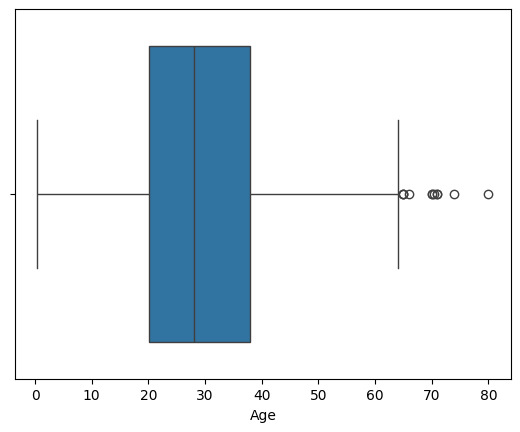

In [ ]:
sns.boxplot(data=dfi,x='Age')

<Axes: ylabel='Fare'>

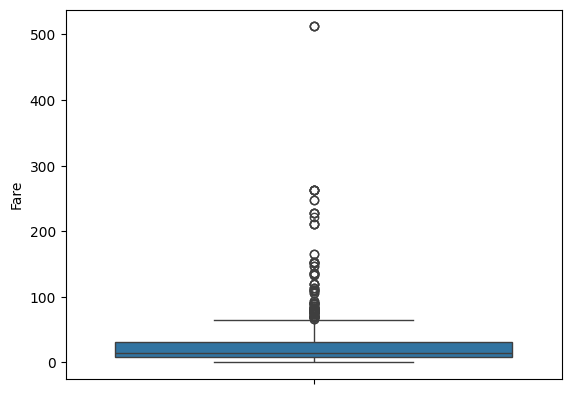

In [ ]:
sns.boxplot(data=dfi,y='Fare')

In [ ]:
df['Age'].skew()

np.float64(0.41433383873076146)

In [ ]:
df['Fare'].skew()

np.float64(4.787316519674893)

##For Age(Triming/Dropoing/Deleting IQR)

In [ ]:
dfi['Age'].skew()

np.float64(0.38910778230082704)

In [ ]:
dfi['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
age_q1=dfi['Age'].quantile(0.25)
age_q3=dfi['Age'].quantile(0.75)
iqr=age_q3-age_q1

lt=age_q1-1.5*iqr
ht=age_q3+1.5*iqr

age_q1,age_q3,iqr,lt,ht

(np.float64(20.125),
 np.float64(38.0),
 np.float64(17.875),
 np.float64(-6.6875),
 np.float64(64.8125))

In [ ]:
dfi.shape

(891, 2)

In [ ]:
#Triming/Droping/Deleting
dfi=dfi[(dfi['Age']<ht) & (dfi['Age']>lt)]
dfi

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


<Axes: ylabel='Age'>

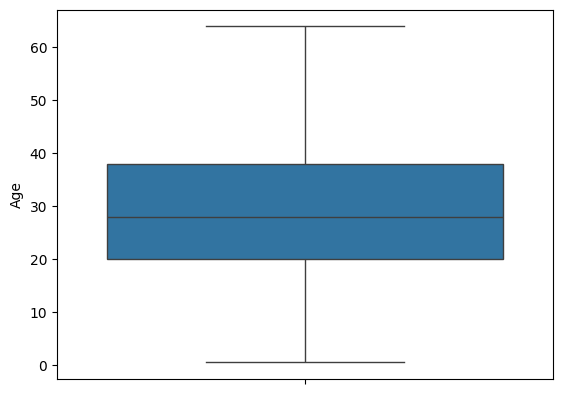

In [ ]:
sns.boxplot(dfi['Age'])

In [ ]:
dfi['Age'].skew()
#reduced Skewness(Done)

np.float64(0.2006193059503503)

In [ ]:
dfi['Age'].isnull().sum()

np.int64(0)

##For Fare(Capping IQR)

<Axes: ylabel='Fare'>

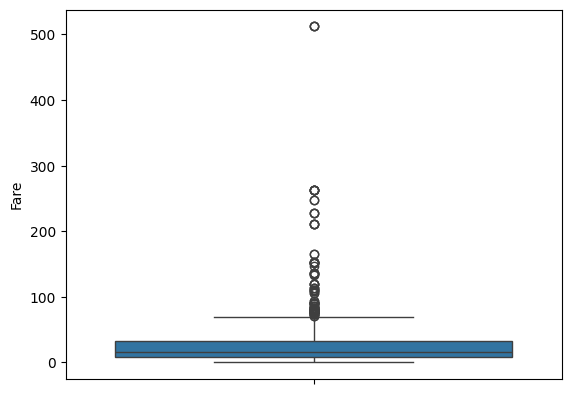

In [ ]:
sns.boxplot(dfi['Fare'])

In [ ]:
dfi['Fare'].skew()

np.float64(4.632758671755632)

<Axes: >

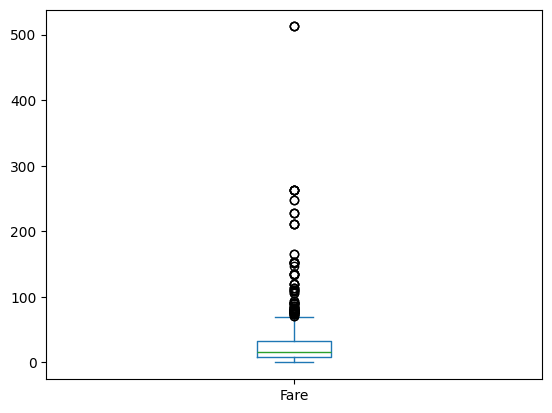

In [ ]:
dfi['Fare'].plot(kind='box')

<Axes: ylabel='Density'>

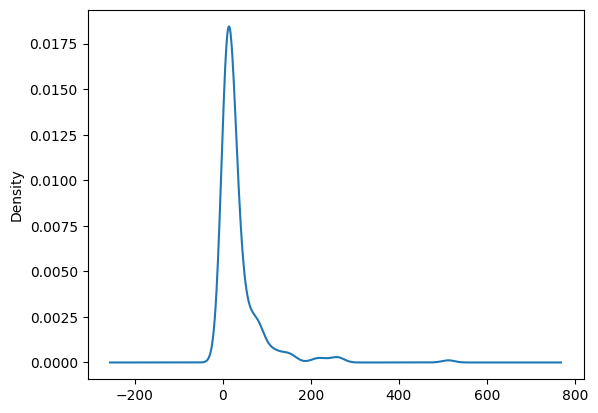

In [ ]:
dfi['Fare'].plot(kind='kde')

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
fare_q1=dfi['Fare'].quantile(.25)
fare_q3=dfi['Fare'].quantile(0.75)
fare_iqr=fare_q3-fare_q1

fare_lt=fare_q1-1.5*fare_iqr
fare_ht=fare_q3+1.5*fare_iqr

fare_q1,fare_q3,fare_iqr,fare_lt,fare_ht

(np.float64(8.05),
 np.float64(33.0),
 np.float64(24.95),
 np.float64(-29.374999999999996),
 np.float64(70.425))

In [ ]:
dfi['Fare']=np.where(dfi['Fare']>fare_ht,fare_ht,np.where(dfi['Fare']<fare_lt,fare_lt,dfi['Fare']))
dfi['Fare'].skew()

np.float64(1.0776217916857647)

In [ ]:
for fare in dfi['Fare']:
  if fare<fare_lt:
    dfi['Fare']=fare_lt
  elif fare>fare_ht:
    dfi['Fare']=fare_ht

# dfi['Fare'].describe()


In [ ]:
dfi['Fare'].describe()


,Fare
count,703.000000
mean,25.964971
std,22.062440
min,0.000000
25%,8.050000
50%,15.741700
75%,33.000000
max,70.425000


In [ ]:
dfi['Fare'].skew()
#Reduced Skewness(Done)

np.float64(1.0776217916857647)

<Axes: >

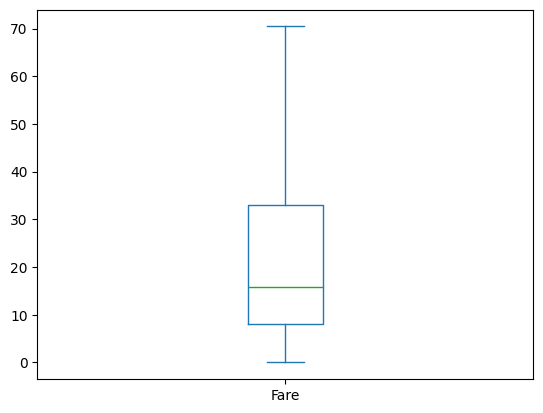

In [ ]:
dfi['Fare'].plot(kind='box')

<Axes: ylabel='Fare'>

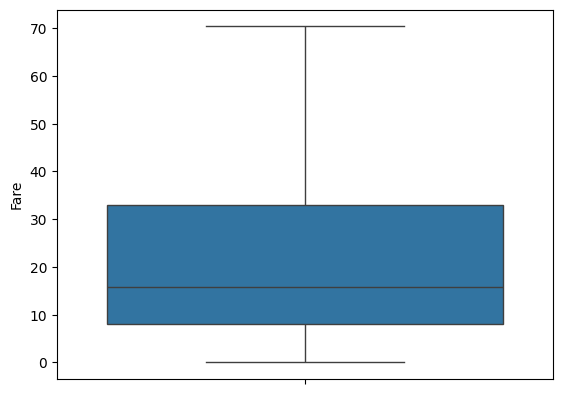

In [ ]:
sns.boxplot(dfi['Fare'])

<Axes: ylabel='Density'>

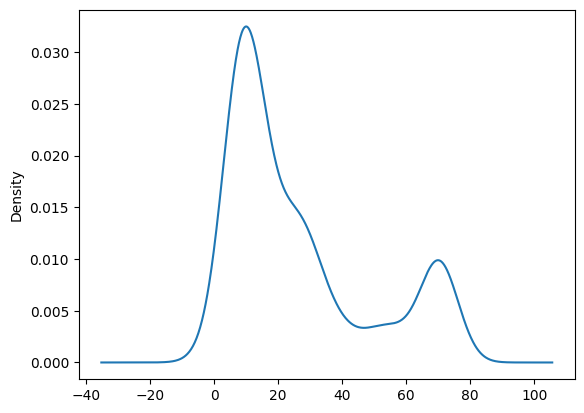

In [ ]:
dfi['Fare'].plot(kind='kde')